In [2]:
# Part 1 - Building the CNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [3]:
import tensorflow as tf
print(tf.__version__)

2.2.0


In [4]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(Conv2D(64, (3, 3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(Conv2D(256, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(512, (3, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(1024, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 10, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [6]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/notebooks/Image_Classification/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/notebooks/Image_Classification/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')


classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 800,
                         validation_data = test_set,    
                         validation_steps = len(test_set))

Found 800 images belonging to 10 classes.
Found 200 images belonging to 10 classes.
Epoch 1/800
25/25 [==============================] - 17s 678ms/step - loss: 2.3037 - accuracy: 0.0950 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 2/800
25/25 [==============================] - 17s 668ms/step - loss: 2.3033 - accuracy: 0.0988 - val_loss: 2.2969 - val_accuracy: 0.1050
Epoch 3/800
25/25 [==============================] - 17s 673ms/step - loss: 2.2863 - accuracy: 0.0887 - val_loss: 2.2843 - val_accuracy: 0.0850
Epoch 4/800
25/25 [==============================] - 16s 658ms/step - loss: 2.2873 - accuracy: 0.1400 - val_loss: 2.2682 - val_accuracy: 0.1150
Epoch 5/800
25/25 [==============================] - 17s 671ms/step - loss: 2.2380 - accuracy: 0.1637 - val_loss: 2.2068 - val_accuracy: 0.1700
Epoch 6/800
25/25 [==============================] - 17s 668ms/step - loss: 2.2167 - accuracy: 0.1663 - val_loss: 2.2408 - val_accuracy: 0.1700
Epoch 7/800
25/25 [==============================] -

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



25/25 [==============================] - 17s 674ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 6.9152 - val_accuracy: 0.3100
Epoch 457/800
25/25 [==============================] - 16s 651ms/step - loss: 0.0224 - accuracy: 0.9950 - val_loss: 7.1408 - val_accuracy: 0.3600
Epoch 458/800
25/25 [==============================] - 16s 646ms/step - loss: 0.0224 - accuracy: 0.9912 - val_loss: 6.6640 - val_accuracy: 0.3350
Epoch 459/800
25/25 [==============================] - 16s 645ms/step - loss: 0.0239 - accuracy: 0.9912 - val_loss: 7.0267 - val_accuracy: 0.3650
Epoch 460/800
25/25 [==============================] - 16s 649ms/step - loss: 0.0254 - accuracy: 0.9925 - val_loss: 7.6834 - val_accuracy: 0.3100
Epoch 461/800
25/25 [==============================] - 17s 662ms/step - loss: 0.0178 - accuracy: 0.9937 - val_loss: 6.8851 - val_accuracy: 0.3400
Epoch 462/800
25/25 [==============================] - 16s 646ms/step - loss: 0.0188 - accuracy: 0.9975 - val_loss: 7.3731 - val_accuracy:

In [25]:
#Saving a Keras model:
saved_model=classifier.save('/notebooks/Image_Classification/modelsave.h5')
saved_model

In [21]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/notebooks/Image_Classification/validation_images/1Butterfly.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
print(result)

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Populating the interactive namespace from numpy and matplotlib


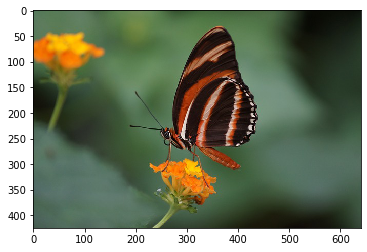

In [36]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/notebooks/Image_Classification/validation_images/1Butterfly.jpg')
imgplot = plt.imshow(img)
plt.show()

In [35]:
if result[0][0] == 1:
    prediction = 'Butterfly'
    print(prediction)
elif result[0][1] == 1:
    prediction = 'Cat'
    print(prediction)
elif result[0][2] == 1:
    prediction = 'Chicken'
    print(prediction)    
elif result[0][3] == 1:
    prediction = 'Cow'
    print(prediction)    
elif result[0][4] == 1:
    prediction = 'Dog'
    print(prediction)    
elif result[0][5] == 1:
    prediction = 'Elephant'
    print(prediction)    
elif result[0][6] == 1:
    prediction = 'Horse'
    print(prediction)    
elif result[0][7] == 1:
    prediction = 'Sheep'
    print(prediction)    
elif result[0][8] == 1:
    prediction = 'Spyder'
    print(prediction)
elif result[0][9] == 1:
    prediction = 'Spyder'
    print(prediction)    
else:
    print("For better accurcy, need to train with more data with epochs")

Butterfly
